In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import emoji
import math


%matplotlib inline

In [2]:
comm_dir = os.path.join('data', 'comment_df_raw.csv')
sub_dir = os.path.join('data', 'submission_df_raw.csv')


df_comm = pd.read_csv(comm_dir, index_col=0)


In [3]:
df_sub = pd.read_csv(sub_dir, index_col=0)

In [4]:
df = pd.concat([df_comm, df_sub], axis=0)

In [5]:
df.shape

(131245, 15)

In [6]:
df.head()

,total_awards_received,author,author_premium,created_utc,flair,is_video,num_comments,score,self_text,title,is_submission,is_op,subreddit_subscribers,upvote_ratio,no_follow
0,0,VacationLover1,True,1610160906,NaN,0,0,983,"Get off me, I’m a Robinhood hundredaire and up...",,0,0,NaN,0.0,False
1,2,Megakittysnuggler,False,1610165200,NaN,0,0,962,My man knows a bad investment when he see one.,,0,0,NaN,0.0,False
2,5,InstagramStockTrader,False,1610176776,NaN,0,0,955,Why does it look like a retarded elephant on a...,,0,0,NaN,0.0,False
3,2,arpatel530,False,1610150619,NaN,0,0,859,True legend. Every single penny was used for s...,,0,0,NaN,0.0,False
4,0,diffcalculus,True,1610171865,NaN,0,0,430,The $150 is *after* the 800%,,0,0,NaN,0.0,False


In [7]:
df.isna().mean()

total_awards_received    0.000000
author                   0.000000
author_premium           0.000000
created_utc              0.000000
flair                    0.518084
is_video                 0.000000
num_comments             0.000000
score                    0.000000
self_text                0.000000
title                    0.000000
is_submission            0.000000
is_op                    0.000000
subreddit_subscribers    0.499829
upvote_ratio             0.000000
no_follow                0.000000
dtype: float64

In [8]:
df.dtypes

total_awards_received      int64
author                    object
author_premium              bool
created_utc                int64
flair                     object
is_video                   int64
num_comments               int64
score                      int64
self_text                 object
title                     object
is_submission              int64
is_op                      int64
subreddit_subscribers    float64
upvote_ratio             float64
no_follow                   bool
dtype: object

## Empty Text
remove [delete] / [removed] / [deleted] text

In [9]:
#remove unwated text in self_text
df = df[~df['self_text'].str.contains('[removed]',
                                     regex=False)]
#removed unwanted text in author
df = df[~df['author'].str.contains('[deleted]',
                                     regex=False)]

#removed unwanted text in title
df = df[~df['title'].str.contains('[deleted]',
                                     regex=False)]

### Drop Duplicates

Assume that it's impossible for two posts to be identical AND created at the same time by the same person, and somehow get to top/hot page.

In [10]:
#drop duplicates
df_dup = df.drop_duplicates(subset = ['author', 'created_utc'],
                            keep='first', 
                            ignore_index=False)

df_dup.shape

(129337, 15)

In [11]:
len(df_dup) / len(df)

0.9998994974874372

In [12]:
df_dup.head()

,total_awards_received,author,author_premium,created_utc,flair,is_video,num_comments,score,self_text,title,is_submission,is_op,subreddit_subscribers,upvote_ratio,no_follow
0,0,VacationLover1,True,1610160906,NaN,0,0,983,"Get off me, I’m a Robinhood hundredaire and up...",,0,0,NaN,0.0,False
1,2,Megakittysnuggler,False,1610165200,NaN,0,0,962,My man knows a bad investment when he see one.,,0,0,NaN,0.0,False
2,5,InstagramStockTrader,False,1610176776,NaN,0,0,955,Why does it look like a retarded elephant on a...,,0,0,NaN,0.0,False
3,2,arpatel530,False,1610150619,NaN,0,0,859,True legend. Every single penny was used for s...,,0,0,NaN,0.0,False
4,0,diffcalculus,True,1610171865,NaN,0,0,430,The $150 is *after* the 800%,,0,0,NaN,0.0,False


### Organize By  Submission Date & Fill In Num Subscribers

Make this assumption:

The number of subscribers at the time of your post is whatever the closest known number is

In [13]:
def sortFillDates(df, col=None):
    """
    returns a copy of df where it is sorted by column
    """
    if not col:
        return df
    
    df_date = df.copy(deep=True)
    
    df_date.sort_values(by=col,
                        inplace=True
                       )
    
    df_date.interpolate(method='linear', 
                        columns=[col], 
                        inplace=True)
    
    df_date = df_date.reset_index(drop=True)
    
    
    return df_date

    

    
df_date = sortFillDates(df_dup, 'created_utc')
#change to readable friendly time
df_date['created_utc'] = pd.to_datetime(df_date['created_utc'], unit='s')

df_date.head()

,total_awards_received,author,author_premium,created_utc,flair,is_video,num_comments,score,self_text,title,is_submission,is_op,subreddit_subscribers,upvote_ratio,no_follow
0,0,chibears20,False,2020-07-01 00:00:23,Discussion,0,11,1,,Bring back polls. Macy’s earnings,1,1,1310116.0,1.0,True
1,0,slow_down_more,False,2020-07-01 00:01:21,NaN,0,0,31,Thanks i had no clue 😎,,0,0,1310118.0,0.0,False
2,0,hombrebad,False,2020-07-01 00:04:02,Meme,0,0,1,,Comfort Inn knows whats up 😎,1,1,1310120.0,1.0,True
3,0,water_boat,False,2020-07-01 00:07:43,DD,0,0,1,,The next $NKLA?,1,1,1310126.0,1.0,True
4,0,water_boat,False,2020-07-01 00:09:27,DD,0,0,1,,The next meme stock? -$WKHS,1,1,1310128.0,1.0,True


In [14]:
df_date['subreddit_subscribers'].isna().mean()

0.0

### What about posts that stay popular over timeframe?

# Get Time Differential

In [15]:
#get first mention of comment
df_first = df_date.drop_duplicates(subset=['self_text', 'title'], keep='first').reset_index(drop=True)
#get last mention of comment
df_last = df_date.drop_duplicates(subset=['self_text', 'title'], keep='last').reset_index(drop=True)

#measure time differnece
created_time_diff =  (df_last['created_utc'] - df_first['created_utc'])

#make into float hours
created_time_diff_hr = created_time_diff/ pd.to_timedelta(1, unit='D')

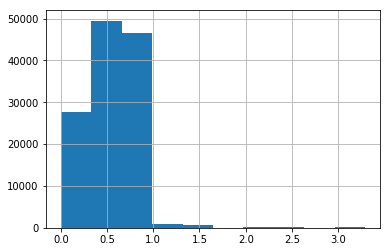

In [16]:
created_time_diff_hr.hist()

In [17]:
df_date.columns

Index(['total_awards_received', 'author', 'author_premium', 'created_utc',
       'flair', 'is_video', 'num_comments', 'score', 'self_text', 'title',
       'is_submission', 'is_op', 'subreddit_subscribers', 'upvote_ratio',
       'no_follow'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14fa530d0>]],
      dtype=object)

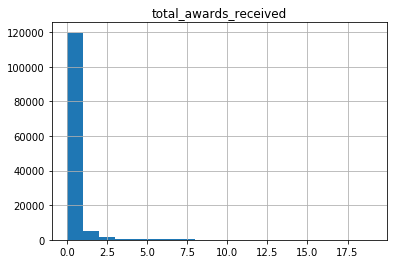

In [18]:
df_date.hist(column='total_awards_received', bins=np.arange(0, 20, 1))

#### put it in a function

In [19]:
def sigmoid_modified(x):
    return 0.5 + (1 / (1 + math.exp(-x)))

def timeDiffDuplicates(df, cols, time_col):
    
    #get first mention of comment
    df_first = df.drop_duplicates(subset=cols, keep='first').reset_index(drop=True)
    #get last mention of comment
    df_last = df.drop_duplicates(subset=cols, keep='last').reset_index(drop=True)

    #measure time differnece
    created_time_diff =  (df_last[time_col] - df_first[time_col])

    #make into float hours
    created_time_diff_hr = created_time_diff/ pd.to_timedelta(1, unit='D')
    
#     #apply sigmoid function
#     time_amplification = created_time_diff_hr.apply(sigmoid_modified)
    
    #make deep copy
    df_time_diff = df.copy(deep=True)
    
    #drop duplicates
    df_time_diff = df.drop_duplicates(subset=cols, keep='first').reset_index(drop=True)
    
    #add column
    df_time_diff['created_time_diff_hr'] = created_time_diff_hr
    
    return df_time_diff
    
df_time_diff = timeDiffDuplicates(df = df_date,
                                  cols=['title', 'self_text'],
                                  time_col='created_utc')

In [20]:
df_time_diff.shape

(125860, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14fb1c710>]],
      dtype=object)

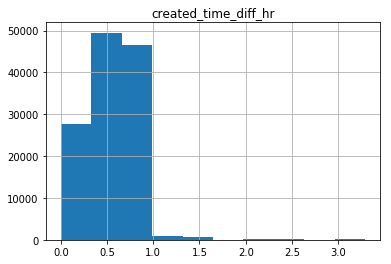

In [21]:
df_time_diff.hist('created_time_diff_hr')

In [22]:
len(df_time_diff) / len(df_date)

0.9731167415356781

## NaN Values

### Flair

In [23]:
#fill NaN with 'no_flair'
df_time_diff['flair'] = df_time_diff['flair'].fillna('no_flair')
df_time_diff['flair'].value_counts(ascending=False)

no_flair                         66462
Discussion                       14486
Shitpost                          8612
Meme                              7217
YOLO                              5065
Gain                              4707
DD                                4331
Stocks                            2966
Options                           2819
Loss                              2688
News                              1418
Satire                            1185
Fundamentals                      1050
Storytime                         1046
Technicals                         853
Chart                              371
Futures                            293
Daily Discussion                   130
Forex                               56
Earnings Thread                     34
WSBbooks                            26
Donation                            21
Mods                                11
Weekend Discussion                  10
Mods - Regarding MrBeast Post        1
Tendies                  

In [24]:
def seriesTopK(series, k=10):
    """
    returns the top k values
    """
    return series.value_counts(ascending=False)[:k].index

In [25]:
def fixFlair(df, k=10):
    """
    returns a new dataframe with dummies on flair column
    """
    
    #get the top k values by count
    flair_top_vals = seriesTopK(df['flair'], k=10)
    
    #make a deep copy
    df_flair = df.copy(deep=True)
    
    #keep only rows where flair is in the top k
    df_flair = df_flair[df_flair['flair'].isin(flair_top_vals)]
    
    #get the dummies
    df_flair = pd.get_dummies(df_flair, #the dataframe
                              prefix='flair', # prefix to be added
                              columns=['flair'] #columns to be dummied
                             )
    
    
    return df_flair


df_flair = fixFlair(df_time_diff, k=10)

In [26]:
df_flair.shape

(119353, 25)

### Collect Emojis


In [27]:
def collectEmojisFromString(text):
    """
    returns a dictionary count of all emojis in a descriptive manner
    """
    
    #get location of all emojis
    emoj_list_loc = emoji.emoji_lis(text)
    
    #make a dictionary
    emoj_dict = {}
    
    for d in emoj_list_loc:
        #de-emojify
        demoj = emoji.demojize(d['emoji'])
        if demoj in emoj_dict:
            emoj_dict[demoj] += 1
        else:
            emoj_dict[demoj] = 1
    
    return emoj_dict
        
    

In [28]:
emoj_list = []

#get the emojis from the two text columns
for self_text, title in zip(df_flair['self_text'], df_flair['title']):
    
    #combine 
    text = ' '.join([self_text, title])
    
    #make a dicto f emojis
    emoj_dict = collectEmojisFromString(text)
    
    #append to list
    emoj_list.append(emoj_dict)
    
#make a dataframe
df_emoj =pd.DataFrame(emoj_list)

#get sum by columns
emoji_col_sum = df_emoj.sum(axis=0)
#keep top 10 emojis
df_emoj_count = df_emoj[emoji_col_sum.sort_values(ascending=False).index[:10]]

#fill missing vals by 0
df_emoj_count.fillna(value=0, inplace=True)

/Users/nadimkawwa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
df_emoj_count.shape

(119353, 10)

In [30]:
#merge
df_emoj = df_flair.merge(right=df_emoj_count,
                         how='left',
                        left_on=df_flair.index, 
                        right_on=df_emoj_count.index,
                         right_index=True,
                         left_index=True)


#fill empty emojis
df_emoj[df_emoj_count.columns] = df_emoj[df_emoj_count.columns].fillna(value = 0)


#check shape
df_emoj.shape

(119353, 35)

In [31]:
df_emoj.head()

,total_awards_received,author,author_premium,created_utc,is_video,num_comments,score,self_text,title,is_submission,...,:rocket:,:gem_stone:,:clown_face:,:bear:,:face_with_tears_of_joy:,:rainbow:,:new_moon:,:gorilla:,:raising_hands:,:full_moon:
0,0,chibears20,False,2020-07-01 00:00:23,0,11,1,,Bring back polls. Macy’s earnings,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,slow_down_more,False,2020-07-01 00:01:21,0,0,31,Thanks i had no clue 😎,,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,hombrebad,False,2020-07-01 00:04:02,0,0,1,,Comfort Inn knows whats up 😎,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,water_boat,False,2020-07-01 00:07:43,0,0,1,,The next $NKLA?,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,water_boat,False,2020-07-01 00:09:27,0,0,1,,The next meme stock? -$WKHS,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#final check for missing values
df_emoj.isna().mean()

total_awards_received       0.0
author                      0.0
author_premium              0.0
created_utc                 0.0
is_video                    0.0
num_comments                0.0
score                       0.0
self_text                   0.0
title                       0.0
is_submission               0.0
is_op                       0.0
subreddit_subscribers       0.0
upvote_ratio                0.0
no_follow                   0.0
created_time_diff_hr        0.0
flair_DD                    0.0
flair_Discussion            0.0
flair_Gain                  0.0
flair_Loss                  0.0
flair_Meme                  0.0
flair_Options               0.0
flair_Shitpost              0.0
flair_Stocks                0.0
flair_YOLO                  0.0
flair_no_flair              0.0
:rocket:                    0.0
:gem_stone:                 0.0
:clown_face:                0.0
:bear:                      0.0
:face_with_tears_of_joy:    0.0
:rainbow:                   0.0
:new_moo

## Create Amplification Score

Consider a list below a measure popularity among popular posts. This does give advantage to submissions over comments, and I believe this is valid since submission titles are the first thing we see before diving into a thread.
- total_awards_received
- num_comments
- upvote_ratio

In [33]:
df_emoj.columns

Index(['total_awards_received', 'author', 'author_premium', 'created_utc',
       'is_video', 'num_comments', 'score', 'self_text', 'title',
       'is_submission', 'is_op', 'subreddit_subscribers', 'upvote_ratio',
       'no_follow', 'created_time_diff_hr', 'flair_DD', 'flair_Discussion',
       'flair_Gain', 'flair_Loss', 'flair_Meme', 'flair_Options',
       'flair_Shitpost', 'flair_Stocks', 'flair_YOLO', 'flair_no_flair',
       ':rocket:', ':gem_stone:', ':clown_face:', ':bear:',
       ':face_with_tears_of_joy:', ':rainbow:', ':new_moon:', ':gorilla:',
       ':raising_hands:', ':full_moon:'],
      dtype='object')

In [34]:
df_emoj[['total_awards_received', 'num_comments', 'upvote_ratio','created_time_diff_hr']].describe()

,total_awards_received,num_comments,upvote_ratio,created_time_diff_hr
count,119353.000000,119353.000000,119353.000000,119353.000000
mean,0.603035,30.309318,0.455133,0.552483
std,9.290493,956.160189,0.492792,0.282831
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.360914
50%,0.000000,0.000000,0.000000,0.570463
75%,0.000000,2.000000,1.000000,0.750046
max,571.000000,146559.000000,1.000000,3.291678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb165095cd0>]],
      dtype=object)

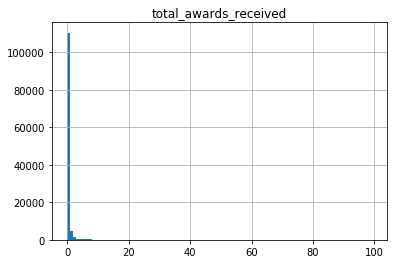

In [35]:
df_emoj.hist(column='total_awards_received', bins=np.arange(0, 100, 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb164e709d0>]],
      dtype=object)

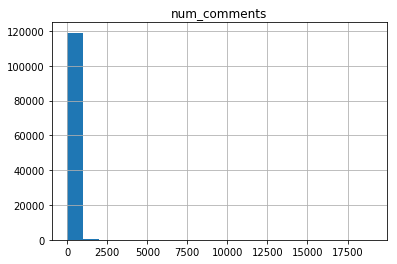

In [36]:
df_emoj.hist(column='num_comments', bins=np.arange(0, 20000, 1000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a0c80150>]],
      dtype=object)

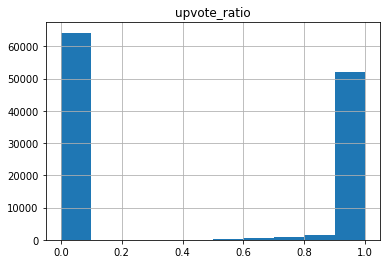

In [37]:
df_emoj.hist(column='upvote_ratio')

In [38]:
#let's create a copy
df_amp = df_emoj.copy(deep=True)

#create amplification column
df_amp['amplification'] = ((df_amp['created_time_diff_hr'] +1) 
                           * (df_amp['upvote_ratio'] +1 ) 
                           * (1+ np.log10(1 + df_amp['num_comments'])) 
                           * (1+ np.log10(1 + df_amp['total_awards_received'])))

# Save the Work

In [39]:
df_amp.to_csv(os.path.join('data', 'data_munged.csv'))